# Recommender Systems
## Finding Similar Movies

In [1]:
import numpy as np
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv', usecols=range(3))
movies = pd.read_csv('movies.csv', usecols=range(2))

In [3]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
ratings.shape

(100836, 3)

In [5]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
movies.shape

(9742, 2)

Merge rating and title

In [6]:
df = pd.merge(movies, ratings)

In [7]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


### EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [9]:
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})

In [10]:
movie_stats.columns

MultiIndex([('rating', 'size'),
            ('rating', 'mean')],
           )

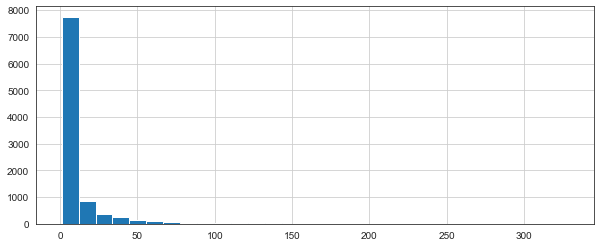

In [12]:
plt.figure(figsize=(10, 4))
movie_stats['rating']['size'].hist(bins=30)

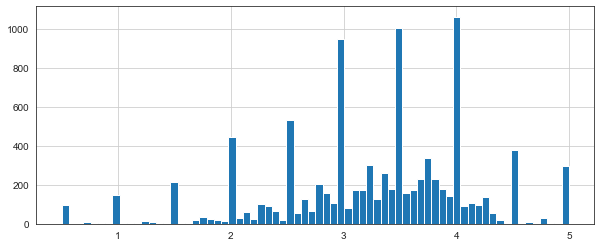

In [13]:
plt.figure(figsize=(10,4))
movie_stats['rating']['mean'].hist(bins=70)

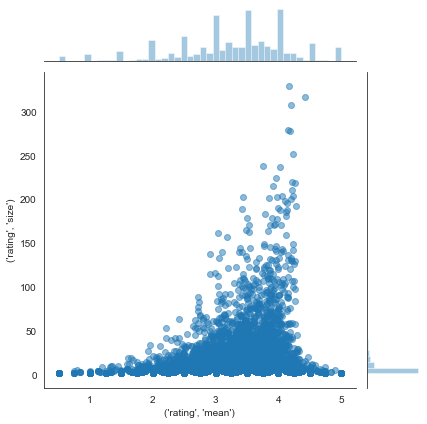

In [14]:
sns.jointplot(x=('rating', 'mean'), y=('rating', 'size'), data=movie_stats, alpha=0.5)

In [15]:
movie_ratings = df.pivot_table(index=['userId'], columns=['title'], values='rating')

In [16]:
movie_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
movie_stats.sort_values([('rating', 'size')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Forrest Gump (1994)                                 329.0  4.164134
Shawshank Redemption, The (1994)                    317.0  4.429022
Pulp Fiction (1994)                                 307.0  4.197068
Silence of the Lambs, The (1991)                    279.0  4.161290
Matrix, The (1999)                                  278.0  4.192446
Star Wars: Episode IV - A New Hope (1977)           251.0  4.231076
Jurassic Park (1993)                                238.0  3.750000
Braveheart (1995)                                   237.0  4.031646
Terminator 2: Judgment Day (1991)                   224.0  3.970982
Schindler's List (1993)                             220.0  4.225000
Fight Club (1999)                                   218.0  4.272936
Toy Story (1995)                                    215.0  3.920930
Star Wars: Episode V - The Empire Strikes Back ...  211.0  4.215640
Usual Suspects, The (1995)                          204.0  4.237745
American Beauty (1999)                              204.0  4.056373

In [18]:
matrix_ratings = movie_ratings['Matrix, The (1999)']

In [19]:
matrix_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [20]:
similar_to_matrix = movie_ratings.corrwith(matrix_ratings)

/Users/pramote/py374-venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/pramote/py374-venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns=['similarity'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,similarity
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [22]:
corr_matrix.sort_values('similarity', ascending=False).head(10)

,similarity
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Paper Towns (2015),1.0
Juwanna Mann (2002),1.0
Topsy-Turvy (1999),1.0


In [23]:
popular_movies = movie_stats['rating']['size'] >= 100
movie_stats[popular_movies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Shawshank Redemption, The (1994)                    317.0  4.429022
Godfather, The (1972)                               192.0  4.289062
Fight Club (1999)                                   218.0  4.272936
Godfather: Part II, The (1974)                      129.0  4.259690
Departed, The (2006)                                107.0  4.252336
Goodfellas (1990)                                   126.0  4.250000
Casablanca (1942)                                   100.0  4.240000
Dark Knight, The (2008)                             149.0  4.238255
Usual Suspects, The (1995)                          204.0  4.237745
Princess Bride, The (1987)                          142.0  4.232394
Star Wars: Episode IV - A New Hope (1977)           251.0  4.231076
Schindler's List (1993)                             220.0  4.225000
Apocalypse Now (1979)                               107.0  4.219626
American History X (1998)                           129.0  4.217054
Star Wars: Episode V - The Empire Strikes Back ...  211.0  4.215640

In [24]:
corr_matrix = corr_matrix.join(movie_stats[popular_movies])
corr_matrix.head()

/Users/pramote/py374-venv/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,similarity,"(rating, size)","(rating, mean)"
title,,,
"'burbs, The (1989)",-0.160843,NaN,NaN
(500) Days of Summer (2009),0.302316,NaN,NaN
*batteries not included (1987),0.392232,NaN,NaN
...And Justice for All (1979),0.654654,NaN,NaN
10 Cent Pistol (2015),-1.000000,NaN,NaN


In [25]:
corr_matrix.dropna(inplace=True)

In [26]:
corr_matrix.sort_values('similarity', ascending=False)[:10]

,similarity,"(rating, size)","(rating, mean)"
title,,,
"Matrix, The (1999)",1.000000,278.0,4.192446
Die Hard (1988),0.544466,145.0,3.862069
Inception (2010),0.514767,143.0,4.066434
Braveheart (1995),0.496045,237.0,4.031646
Aliens (1986),0.470865,126.0,3.964286
"Lion King, The (1994)",0.444932,172.0,3.941860
"Monsters, Inc. (2001)",0.441205,132.0,3.871212
Batman Begins (2005),0.440338,116.0,3.862069
Jurassic Park (1993),0.427936,238.0,3.750000


In [27]:
forrest_gump_user_ratings = movie_ratings['Forrest Gump (1994)']

In [28]:
similar_to_forrest_gump = movie_ratings.corrwith(forrest_gump_user_ratings)

In [29]:
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump, columns=['similarity'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,similarity
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [30]:
corr_forrest_gump.sort_values('similarity', ascending=False).head(10)

,similarity
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [31]:
corr_forrest_gump = corr_forrest_gump.join(movie_stats[popular_movies])
corr_forrest_gump.dropna(inplace=True)

In [32]:
corr_forrest_gump.sort_values('similarity', ascending=False)[:10]

,similarity,"(rating, size)","(rating, mean)"
title,,,
Forrest Gump (1994),1.000000,329.0,4.164134
Good Will Hunting (1997),0.484042,141.0,4.078014
Aladdin (1992),0.464268,183.0,3.792350
American History X (1998),0.457287,129.0,4.217054
"Truman Show, The (1998)",0.432556,125.0,3.812000
Braveheart (1995),0.416976,237.0,4.031646
Ferris Bueller's Day Off (1986),0.405830,109.0,3.839450
Mrs. Doubtfire (1993),0.401408,144.0,3.388889
Full Metal Jacket (1987),0.397241,102.0,4.098039
